In [91]:
from pandas import read_csv
import numpy as np
import pysindy as ps

control_data = read_csv("control_data.csv")
otus=["OTU25", "OTU84" ] #, "OTU98"] #, "OTU130"] # , "OTU140", "OTU150", "OTU214", "OTU217", "OTU221"]
df = control_data.T 
df.columns = df.iloc[0]
df_new = df.drop(df.index[0])

OTU25' = -0.033 1 + -0.394 OTU25 + -0.140 OTU25^2 + -0.087 OTU25 OTU84
OTU84' = 0.689 1 + 1.540 OTU25 + -0.372 OTU84 + 0.517 OTU25^2 + -0.048 OTU25 OTU84


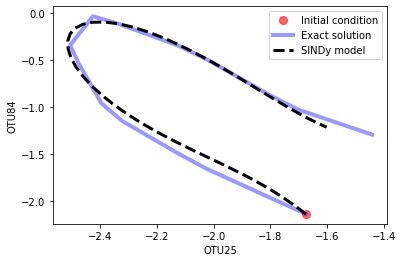

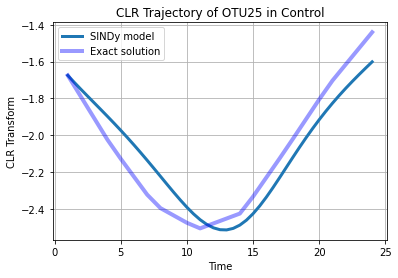

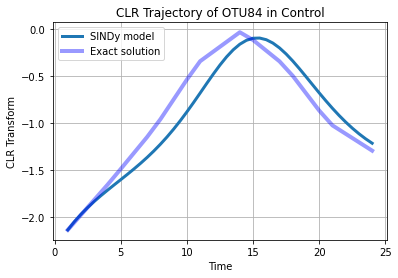

<Figure size 432x288 with 0 Axes>

In [93]:
df_PC2 = df_new[otus].to_numpy() 

t = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 
X = df_PC2.astype(float)

differentiation_method = ps.FiniteDifference(order=2)
#differentiation_method = ps.FiniteDifference(drop_endpoints=True)    

feature_library = ps.PolynomialLibrary(degree=2)
optimizer = ps.STLSQ(threshold=0.045)

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=otus
)
model.fit(X, t=t)
model.print()
OTU25 = -1.67519677719225
OTU84 = -2.14033228335729

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 

sim = model.simulate([OTU25, OTU84], t=t_test) #, OTU98#

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(OTU25, OTU84, "ro", label="Initial condition", alpha=0.6, markersize=8)
ax.plot(X[:,0], X[:,1], "b", label="Exact solution", alpha=0.4, linewidth=4)
ax.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
ax.set(xlabel="OTU25", ylabel="OTU84")
ax.legend()

import matplotlib.pyplot as plt
import numpy as np

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 

s = sim[:, 0] #OTU guesses 

fig, ax = plt.subplots()
ax.plot(t_test, s, label="SINDy model", linewidth=3)
ax.plot(t_test, X[:,0], "b", label="Exact solution", alpha=0.4, linewidth=4)

ax.legend()
ax.set(xlabel='Time', ylabel='CLR Transform',
       title='CLR Trajectory of OTU25 in Control')
ax.grid()

fig.savefig("test.png")
plt.show()

import matplotlib.pyplot as plt
import numpy as np

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 
i=1
s = sim[:, i] #OTU guesses 

fig, ax = plt.subplots()
ax.plot(t_test, s, label="SINDy model", linewidth=3)
ax.plot(t_test, X[:,i], "b", label="Exact solution", alpha=0.4, linewidth=4)

ax.legend()
ax.set(xlabel='Time', ylabel='CLR Transform',
       title='CLR Trajectory of OTU84 in Control')
ax.grid()

fig.savefig("test.png")
plt.show()
plt.tight_layout()

OTU25' = 0.000
OTU84' = 0.000


/Users/paul/opt/anaconda3/envs/sindy/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:163: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


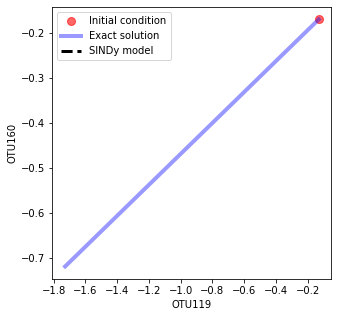

In [77]:
from pandas import read_csv
import numpy as np
import pysindy as ps

vanco_data = read_csv("vancomycin_data.csv")

#OTU119 OTU120  OTU128  OTU160  OTU169 
#otus=["OTU120", "OTU169"] #, "OTU98"] #, "OTU130"] # , "OTU140", "OTU150", "OTU214", "OTU217", "OTU221"]

df = vanco_data.T 
df.columns = df.iloc[0]
df_new = df.drop(df.index[0])

df_PC2 = df_new[otus].to_numpy() 

t = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 
X = df_PC2.astype(float)

differentiation_method = ps.FiniteDifference(order=2)
#differentiation_method = ps.FiniteDifference(drop_endpoints=True)    

feature_library = ps.PolynomialLibrary(degree=2)
optimizer = ps.STLSQ(threshold=0.09)

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=otus
)

def u_fun(t):
    return np.column_stack([np.int64((t >= 9) & (t<=23)), np.int64((t >= 5) & (t<9))])

# def u_fun(t):
#     return np.column_stack([np.sin(2 * t), t ** 2])

u_train = u_fun(t)
model.fit(X, t=t)
model.print()
OTU119 = df_PC2[0][0]
OTU160 = df_PC2[0][1]

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 

sim = model.simulate([OTU119, OTU160], t=t_test) #, OTU98#,u=u_train

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(OTU119, OTU160, "ro", label="Initial condition", alpha=0.6, markersize=8)
ax.plot(X[:,0], X[:,1], "b", label="Exact solution", alpha=0.4, linewidth=4)
ax.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
ax.set(xlabel="OTU119", ylabel="OTU160")
ax.legend()

In [26]:
from scipy.integrate import odeint
# Control input
def u_fun(t):
    return np.column_stack([np.sin(2 * t), t ** 2])

# Lorenz equations with control input
def lorenz_control(z, t):
    u = u_fun(t)
    return [
        10 * (z[1] - z[0]) + u[0, 0] ** 2,
        z[0] * (28 - z[2]) - z[1],
        z[0] * z[1] - 8 / 3 * z[2] - u[0, 1],
    ]

# Generate measurement data
dt = .002

t_train = np.arange(0, 10, dt)
x0_train = [-8, 8, 27]
x_train = odeint(lorenz_control, x0_train, t_train)
u_train = u_fun(t_train)

# Instantiate and fit the SINDYc model
model = ps.SINDy()
model.fit(x_train, u=u_train, t=dt)
model.print()

u_train.shape

x0' = -9.999 x0 + 9.999 x1 + 1.000 u0^2
x1' = 27.987 x0 + -0.997 x1 + -1.000 x0 x2
x2' = -2.666 x2 + -1.000 u1 + 1.000 x0 x1


(5000, 2)

OTU120' = 0.148 1 + 0.223 OTU120 + 0.224 OTU169 + 0.065 u0 + -0.084 OTU120^2 + -0.049 OTU120 u0 + -0.043 OTU169^2 + 0.065 u0^2
OTU169' = 0.195 1 + 0.696 OTU120 + 0.087 OTU169 + 0.178 u0 + 0.017 u1 + 0.538 OTU120^2 + -1.082 OTU120 OTU169 + -0.082 OTU120 u0 + -0.271 OTU120 u1 + 0.309 OTU169^2 + 0.178 u0^2 + 0.017 u1^2


/Users/paul/opt/anaconda3/envs/sindy/lib/python3.8/site-packages/pysindy/pysindy.py:789: UserWarning: Last time point dropped in simulation because interpolation of control input was used. To avoid this, pass in a callable for u.
  warnings.warn(


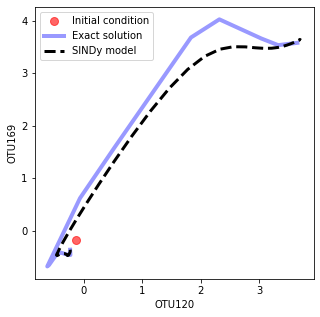

In [83]:
from pandas import read_csv
import numpy as np
import pysindy as ps

vanco_data = read_csv("vancomycin_data.csv")

#OTU119 OTU120  OTU128  OTU160  OTU169 
otus=["OTU120", "OTU169"]#, "OTU98"] #, "OTU130"] # , "OTU140", "OTU150", "OTU214", "OTU217", "OTU221"]

df = vanco_data.T 
df.columns = df.iloc[0]
df_new = df.drop(df.index[0])

df_PC2 = df_new[otus].to_numpy() 

t = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 
X = df_PC2.astype(float)

differentiation_method = ps.FiniteDifference(order=2)
#differentiation_method = ps.FiniteDifference(drop_endpoints=True)    

feature_library = ps.PolynomialLibrary(degree=2, include_bias=True)
optimizer = ps.STLSQ(threshold=0.035) #0.07 #0.03 0.35

namaewa = otus + ["u0","u1"]

model = ps.SINDy(differentiation_method=differentiation_method,
                 feature_library=feature_library,
                 optimizer=optimizer,
                 feature_names=namaewa 
                )

def u_fun(t):
    return np.column_stack([np.int64((t >= 9) & (t<=23)), np.int64((t >= 5) & (t<9))])

# def u_fun(t):
#     return np.column_stack([np.sin(2 * t), t ** 2])

u_train = u_fun(t)
model.fit(X,u=u_train, t=t)

u_train.shape 
model.print()

OTU120 = df_PC2[0][0]
OTU169 = df_PC2[0][1]
#OTU98 = df_PC2[0][2]

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 

sim = model.simulate([OTU120, OTU169], t=t_test, u=u_train) #, OTU98]

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(OTU119, OTU160, "ro", label="Initial condition", alpha=0.6, markersize=8)
ax.plot(X[:,0], X[:,1], "b", label="Exact solution", alpha=0.4, linewidth=4)
ax.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
ax.set(xlabel="OTU120", ylabel="OTU169")
ax.legend()

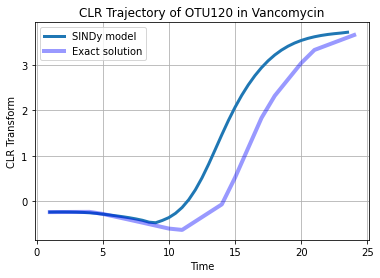

In [84]:
import matplotlib.pyplot as plt
import numpy as np

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 

s = sim[:, 0] #OTU guesses 

fig, ax = plt.subplots()
ax.plot(t_test[:-1], s, label="SINDy model", linewidth=3)
ax.plot(t_test, X[:,0], "b", label="Exact solution", alpha=0.4, linewidth=4)

ax.legend()
ax.set(xlabel='Time', ylabel='CLR Transform',
       title='CLR Trajectory of OTU120 in Vancomycin')
ax.grid()

fig.savefig("test.png")
plt.show()

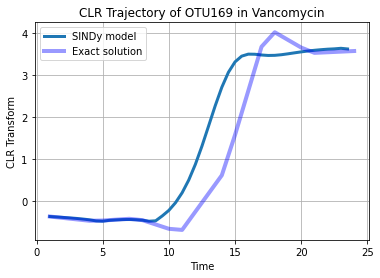

In [85]:
import matplotlib.pyplot as plt
import numpy as np

t_test = np.arange(1,24+0.5, 0.5) #adds the last end point as well. 
i=1
s = sim[:, i] #OTU guesses 

fig, ax = plt.subplots()
ax.plot(t_test[:-1], s, label="SINDy model", linewidth=3)
ax.plot(t_test, X[:,i], "b", label="Exact solution", alpha=0.4, linewidth=4)

ax.legend()
ax.set(xlabel='Time', ylabel='CLR Transform',
       title='CLR Trajectory of OTU169 in Vancomycin')
ax.grid()

fig.savefig("test.png")
plt.show()